In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/homicide-reports/database.csv


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split







###melihat data (database.csv)

In [3]:
dataFrame = pd.read_csv('/kaggle/input/homicide-reports/database.csv')
dataFrame.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


###mengubah data Perpetrator Age dari str ke int

In [4]:
def clean_string(s):
    try:
        s = s.replace(' ', '0')
    except:
        pass

    return s

dataFrame['Perpetrator Age'] = pd.to_numeric(dataFrame['Perpetrator Age'].apply(clean_string), errors='coerce')

In [25]:
pd.set_option('max_rows',500)
pd.set_option('max_columns',800)

In [28]:
dataFrame.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source', 'PVSex', 'EthK', 'RaceK'],
      dtype='object')

###melihat semua nama dan tipe data 

In [5]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null int64
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    63845

###tempat terjadinya homicide terbanyak

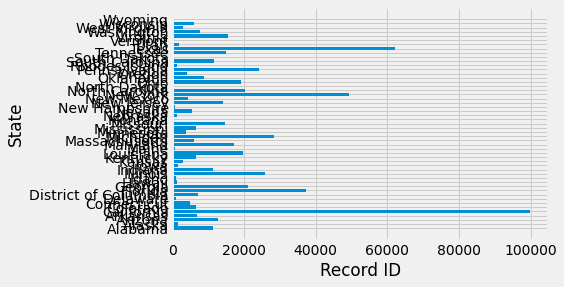

In [6]:
tempatnya = dataFrame.groupby(['State'])['Record ID'].count()
plt.style.use('fivethirtyeight')

plt.barh(tempatnya.index, tempatnya)
plt.xlabel('Record ID')
plt.ylabel('State')
plt.show()

###tahun terbanyak dilalkukannya pembunuhan

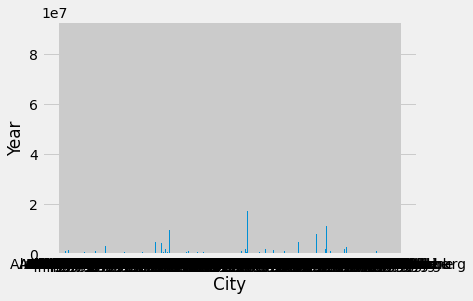

In [7]:
tahunnya = dataFrame.groupby(['City'])['Year'].sum()
plt.bar(tahunnya.index, tahunnya)
plt.xlabel('City')
plt.ylabel('Year')
plt.show()



###menghapus data unknown dan juga beberapa data yang tidak diperlukan

In [8]:
dataFramee = dataFrame.replace('Unknown', np.nan)
dataFramee = dataFrame.dropna()


data = (dataFrame.drop(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'State' ,'Crime Solved', 'Agency Name', 'Victim Count', 'Perpetrator Count'],axis=1))

ID = dataFrame['Record ID'].values


data.head()

,City,Year,Month,Incident,Crime Type,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Record Source
0,Anchorage,1980,January,1,Murder or Manslaughter,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,FBI
1,Anchorage,1980,March,1,Murder or Manslaughter,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,FBI
2,Anchorage,1980,March,2,Murder or Manslaughter,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,FBI
3,Anchorage,1980,April,1,Murder or Manslaughter,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,FBI
4,Anchorage,1980,April,2,Murder or Manslaughter,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,FBI


###data

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


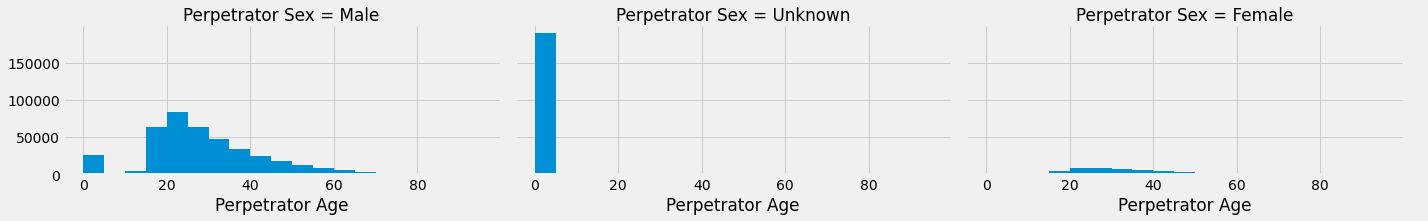

In [9]:
bins = np.arange(0, 100, 5)
#datasetNoUnknown = dataFrame.loc[(dataFrame['Perpetrator Sex' != 'Unknown'])]
grid = sns.FacetGrid(dataFrame, col = 'Perpetrator Sex', size = 3.3, aspect = 2)
grid.map(plt.hist,'Perpetrator Age', bins = bins)
grid.add_legend()

###jumlah korban pertahun

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


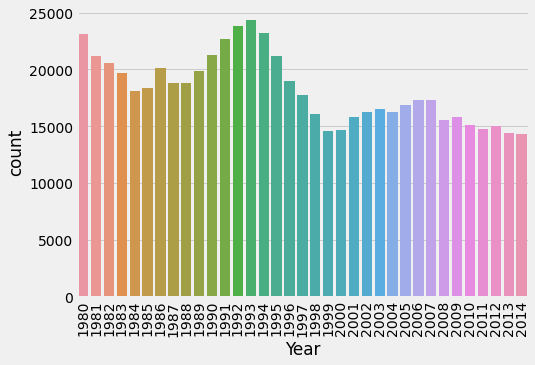

In [10]:
data = sns.factorplot("Year", data=dataFrame, aspect=1.5, kind="count")
data.set_xticklabels(rotation=90)

###jumlah korban pembunuhan sesuai gender

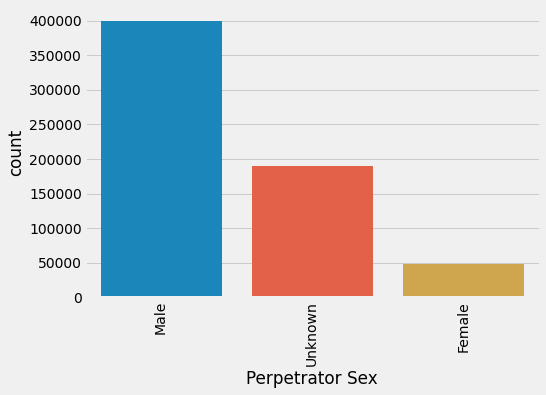

In [11]:
data = sns.factorplot("Perpetrator Sex", data=dataFrame, aspect=1.5, kind="count")
data.set_xticklabels(rotation=90)

###data pembunuhan sesuai Ethnicity

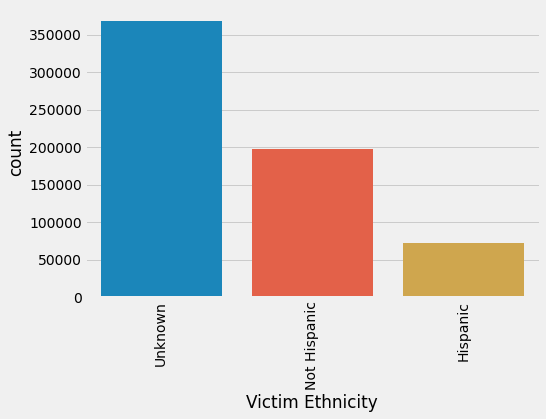

In [12]:
data = sns.factorplot("Victim Ethnicity", data=dataFrame, aspect=1.5, kind="count")
data.set_xticklabels(rotation=90)

###pembunuhan sesuai race

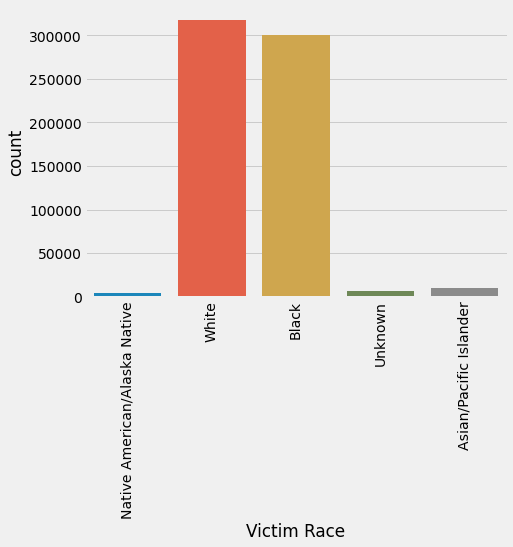

In [13]:
data = sns.factorplot("Victim Race", data=dataFrame, aspect=1.5, kind="count")
data.set_xticklabels(rotation=90)

###senjata yang paling banyak digunakan

In [14]:
dataFrame.groupby(["State", "Weapon"]).size().reset_index(name="Count").sort_values(by='Count', ascending=False)

,State,Weapon,Count
69,California,Handgun,55429
666,Texas,Handgun,29843
498,New York,Handgun,26452
208,Illinois,Handgun,15492
70,California,Knife,14989
...,...,...,...
294,Maine,Fall,1
403,Montana,Drugs,1
81,Colorado,Fall,1
112,Delaware,Fall,1


###data perbandingan jumlah homicide pada sex dan umur

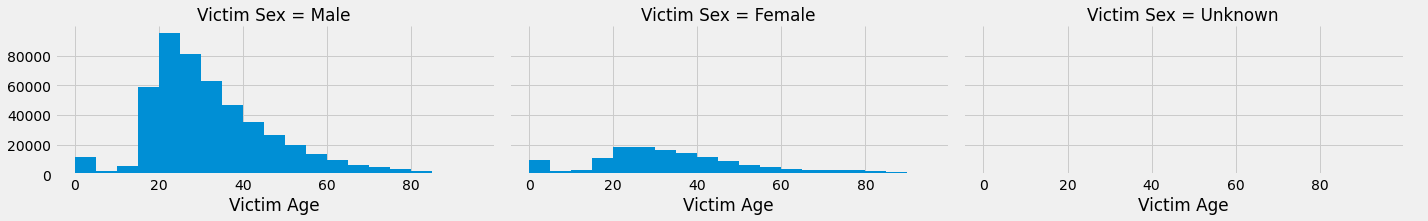

In [15]:
bins = np.arange(0, 100, 5)
data = sns.FacetGrid(dataFrame, col='Victim Sex', size=3.3, aspect=2)
data.map(plt.hist,'Victim Age', bins = bins)
data.add_legend()

###bulan yang paling banyak homicidenya

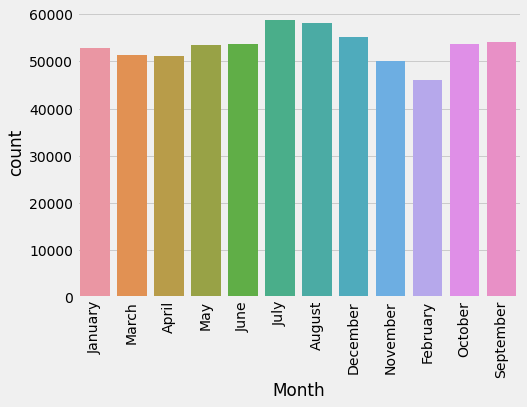

In [16]:
data = sns.factorplot("Month", data=dataFrame, aspect=1.5, kind="count")
data.set_xticklabels(rotation=90)

###pembunuhan tertinggi berdasarkan jenis kelamin 

In [17]:

dataFrame['PVSex'] = 'Unknown kills ?'

#perempuan x perempuan
dataFrame['PVSex'][(dataFrame['Perpetrator Sex'] == 'Female') & (dataFrame['Victim Sex'] == 'Female')] = 'Female kills Female'
 
#perempuan x laki laki
dataFrame['PVSex'][(dataFrame['Perpetrator Sex'] == 'Female') & (dataFrame['Victim Sex'] == 'Male')] = 'Female kills Male'

#laki laki x laki laki
dataFrame['PVSex'][(dataFrame['Perpetrator Sex'] == 'Male') & (dataFrame['Victim Sex'] == 'Male')] = 'Male kills Male'

#laki laki x perempuan
dataFrame['PVSex'][(dataFrame['Perpetrator Sex'] == 'Male') & (dataFrame['Victim Sex'] == 'Female')] = 'Male kills Female'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda

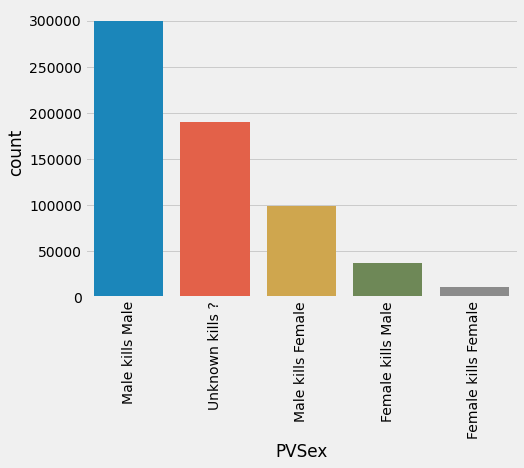

In [18]:
g = sns.factorplot("PVSex", data=dataFrame, aspect=1.5, kind="count")
g.set_xticklabels(rotation=90)

###apakah kasus pembunuhan cenderung ke etnis yang sama atau yang beda ?

In [19]:

dataFrame['EthK'] = 'Unknown kills ?'

#Not Hispanic x Not Hispanic
dataFrame['EthK'][(dataFrame['Perpetrator Ethnicity'] == 'Not Hispanic') & (dataFrame['Victim Ethnicity'] == 'Not Hispanic')] = 'Not Hispanic kills Not Hispanic'
 
#Not Hispanic x Hispanic
dataFrame['EthK'][(dataFrame['Perpetrator Ethnicity'] == 'Not Hispanic') & (dataFrame['Victim Ethnicity'] == 'Hispanic')] = 'Not Hispanic kills Hispanic'

#Hispanic x Not Hispanic
dataFrame['EthK'][(dataFrame['Perpetrator Ethnicity'] == 'Hispanic') & (dataFrame['Victim Ethnicity'] == 'Not Hispanic')] = 'Hispanic kills Not Hispanic'

#Hispanic x Hispanic
dataFrame['EthK'][(dataFrame['Perpetrator Ethnicity'] == 'Hispanic') & (dataFrame['Victim Ethnicity'] == 'Hispanic')] = 'Hispanic kills Hispanic'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda

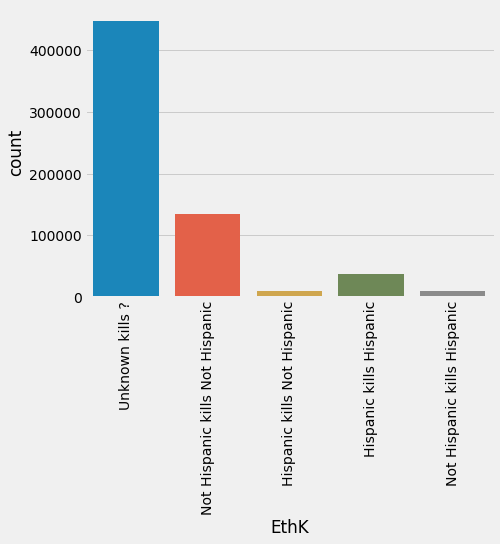

In [20]:
g = sns.factorplot("EthK", data=dataFrame, aspect=1.5, kind="count")
g.set_xticklabels(rotation=90)

###senjata pembunuhan yang paling banyak digunakan dalam wilayah

In [21]:
dataFrame.groupby(["State", "Weapon"]).size().reset_index(name="Count").sort_values(by='Count', ascending=False)

,State,Weapon,Count
69,California,Handgun,55429
666,Texas,Handgun,29843
498,New York,Handgun,26452
208,Illinois,Handgun,15492
70,California,Knife,14989
...,...,...,...
294,Maine,Fall,1
403,Montana,Drugs,1
81,Colorado,Fall,1
112,Delaware,Fall,1


###apakah pembunuhan tergantung pada sesama atau beda ras ?

In [22]:
dataFrame['RaceK'] = 'Unknown kills ?'

#Native American/Alaska Native x Native American/Alaska Native
dataFrame['RaceK'][(dataFrame['Perpetrator Race'] == 'Native American/Alaska Native') & (dataFrame['Victim Race'] == 'Native American/Alaska Native')] = 'Native American/Alaska Native kills Native American/Alaska Native'
 
#Native American/Alaska Native x White
dataFrame['RaceK'][(dataFrame['Perpetrator Race'] == 'Native American/Alaska Native') & (dataFrame['Victim Race'] == 'White')] = 'Native American/Alaska Native kills White'

#Native American/Alaska Native x Black
dataFrame['RaceK'][(dataFrame['Perpetrator Race'] == 'Native American/Alaska Native') & (dataFrame['Victim Race'] == 'Black')] = 'Native American/Alaska Native kills Black'

#Native American/Alaska Native x Asian/Pacific Islander
dataFrame['RaceK'][(dataFrame['Perpetrator Race'] == 'Native American/Alaska Native') & (dataFrame['Victim Race'] == 'Asian/Pacific Islander')] = 'Native American/Alaska Native kills Asian/Pacific Islander'

#White x Native American/Alaska Native
dataFrame['RaceK'][(dataFrame['Perpetrator Race'] == 'White') & (dataFrame['Victim Race'] == 'Native American/Alaska Native')] = 'White kills Native American/Alaska Native'
 
#White x White
dataFrame['RaceK'][(dataFrame['Perpetrator Race'] == 'White') & (dataFrame['Victim Race'] == 'White')] = 'White kills White'

#White x Black
dataFrame['RaceK'][(dataFrame['Perpetrator Race'] == 'White') & (dataFrame['Victim Race'] == 'Black')] = 'White kills Black'

#White x Asian/Pacific Islander
dataFrame['RaceK'][(dataFrame['Perpetrator Race'] == 'White') & (dataFrame['Victim Race'] == 'Asian/Pacific Islander')] = 'White kills Asian/Pacific Islander'

#Black x Native American/Alaska Native
dataFrame['RaceK'][(dataFrame['Perpetrator Race'] == 'Black') & (dataFrame['Victim Race'] == 'Native American/Alaska Native')] = 'Black kills Native American/Alaska Native'
 
#Black x White
dataFrame['RaceK'][(dataFrame['Perpetrator Race'] == 'Black') & (dataFrame['Victim Race'] == 'White')] = 'Black kills White'

#Black x Black
dataFrame['RaceK'][(dataFrame['Perpetrator Race'] == 'Black') & (dataFrame['Victim Race'] == 'Black')] = 'Black kills Black'

#Black x Asian/Pacific Islander
dataFrame['RaceK'][(dataFrame['Perpetrator Race'] == 'Black') & (dataFrame['Victim Race'] == 'Asian/Pacific Islander')] = 'Black kills Asian/Pacific Islander'

#Asian/Pacific Islander x Native American/Alaska Native
dataFrame['RaceK'][(dataFrame['Perpetrator Race'] == 'Asian/Pacific Islander') & (dataFrame['Victim Race'] == 'Native American/Alaska Native')] = 'Asian/Pacific Islander kills Native American/Alaska Native'
 
#Asian/Pacific Islander x White
dataFrame['RaceK'][(dataFrame['Perpetrator Race'] == 'Asian/Pacific Islander') & (dataFrame['Victim Race'] == 'White')] = 'Asian/Pacific Islander kills White'

#Asian/Pacific Islander x Black
dataFrame['RaceK'][(dataFrame['Perpetrator Race'] == 'Asian/Pacific Islander') & (dataFrame['Victim Race'] == 'Black')] = 'Asian/Pacific Islander kills Black'

#Asian/Pacific Islander x Asian/Pacific Islander
dataFrame['RaceK'][(dataFrame['Perpetrator Race'] == 'Asian/Pacific Islander') & (dataFrame['Victim Race'] == 'Asian/Pacific Islander')] = 'Asian/Pacific Islander kills Asian/Pacific Islander'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda

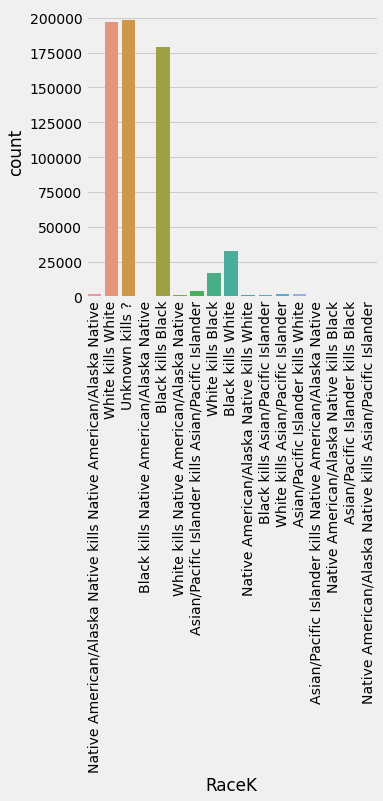

In [23]:
g = sns.factorplot("RaceK", data=dataFrame, aspect=2, kind="count")
g.set_xticklabels(rotation=90)

prediksi jenis kelamin tersangka

In [43]:
#always dataframe starts with 0
X = dataFrame.iloc[:,3:17].values
Y = dataFrame.iloc[:,19:].values
Xdf = dataFrame.iloc[:,3:17]
Ydf = dataFrame.iloc[:,19:] # relationship

from sklearn.model_selection import train_test_split
Xtrain_samp,Xtest_samp,Ytrain_samp,Ytest_samp = train_test_split(X,Y,train_size=0.99,random_state=42)

X=Xtrain_samp
rel=Ytrain_samp


Xcate1=[0,1,3,5,6,7,9,10,11]
Xcate2=[0,1,3,9,10,11]

from sklearn.preprocessing import OneHotEncoder,LabelEncoder

for i in Xcate1:
    label=LabelEncoder()
    i=int(i)
    X[:,i]=label.fit_transform(X[:,i])

temp=[]    
for i in Xcate2:
    temp.append(max(X[:,i:i+1]))

maxs=[]  
for i in range (0,len(temp)):
    maxs.append(temp[i][0])


one = OneHotEncoder(categorical_features=[0,1,3,9,10,11])
X =  one.fit_transform(X).toarray()


indep_var = pd.DataFrame(data=X[0:,0:])


del_v = [0,40,60,66,69,80]

for i in del_v:
    del indep_var[i]


# target variable ( perpetrator relationship) conversion

Ycate1 = [0]
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

for i in Ycate1:
    label=LabelEncoder()
    i=int(i)
    rel[:,i]=label.fit_transform(rel[:,i])

temp=[]    
for i in Ycate1:
    temp.append(max(rel[:,i:i+1]))
#starts with 0
maxs=[]  
for i in range (0,len(temp)):
    maxs.append(temp[i][0])


one = OneHotEncoder(categorical_features=[0])
rel =  one.fit_transform(rel).toarray()


dep_var = pd.DataFrame(data=rel[0:,0:])
del dep_var[0]


split_test_size = 0.30

x_train,x_test,y_train,y_test = train_test_split(indep_var,dep_var,test_size=split_test_size,random_state = 42)

print('Predicting the Perpetrator Relationship using K-neighbors Classifier.')
print('This Might take few minutes...')

from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=25)
knc.fit(x_train,y_train)
y_pred= knc.predict(x_test)

from sklearn.metrics import accuracy_score
print('The accuracy of predicting perpetrator Gender is : %.2f' % accuracy_score(y_test, y_pred))

TypeError: __init__() got an unexpected keyword argument 'categorical_features'